# **CSE 164, Assignment 1, Spring 2022**


## **Name**:          
## **Student ID**:

## Instruction 

- Submit your assignments onto **Canvas** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file with solutions to the programming assignment.
    
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 
- Don't use any magic function from other libraries. You will get **no credit** if a Gaussian function from a known library is used when you are asked to implement “Gaussian Filtering” from scratch.
- Don't change the input and output structure of pre-defined functions. Most coding parts can be finished with about 5-6 lines of codes. 
- Make sure you have installed required packages: <code>numpy, scikit-image, PIL, opencv-python, matplotlib</code>

## Objective 

- **Task 1:** Review of **Image Filtering**
- **Task 2:** Review of **Edge Detection**
- **Task 3:** Getting familiar with **Numpy**, **OpenCV**, and **Matplotlib**

## Preparation: Import the Dependencies

> This section loads some required libraries used in this notebook: **numpy**,**cv2**, **skimage**, **PIL**, **matplotlib**

In [27]:
import numpy as np
import cv2 as cv 
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

## Preparation: Read Image from Urls

> In this step we will read an image from url, and display it using Matplotlib.

In [ ]:
url = "https://news.ucsc.edu/2011/06/images/slugcloseup350.jpg"  

image = io.imread(url)
print(f'image shape: {image.shape}')
plt.xticks([]), plt.yticks([])
plt.imshow(image)

## Question1: Gaussian Filtering (10pts)

> In this question, you will apply gaussian filtering to an image corrupted by gaussian noise.





Add gaussian noise onto the clean image, which can be directly sampled from a normal(gaussian) distribution.

In [3]:
row, column, channel = image.shape
mean = 0
var = 25
sigma = var**0.5
gauss_noise = np.random.normal(mean,sigma, (row,column,channel))
gauss_noise = gauss_noise.reshape(row,column,channel)
gauss_noisy_image = (image + gauss_noise).astype(np.uint8)

## Question1.1 (10pts)
**Compute 2D gaussian kernel using 1D gaussian kernel with OpenCV api.**

> The gaussian kernel is an approximation of a gaussian function, where the nearest neighboring pixels have the most influence on the output.


> In OpenCV, the gaussian kernel is created with the function, [cv.getGaussianKernel()](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa). Besides the the width and height of the kernel, we should also specify the standard deviation of the gaussian function in the X and Y directions. Check the docs for more details. Note that cv.getGaussianKernel() only return 1d gaussian kernel. It is you job to create 2d gaussian kernel from 1d gaussian kernel (hint: separability)


> OpenCV provides a function [cv.filter2D()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) to convolve a user-defined kernel with an image. The call to cv.filter2D() is provided in this assignment. Your job is to create a proper gaussian kernel.

In [4]:
def gauss_filter(img, ksize, sigma):
  # ksize is the kernel size. It should be odd and positive.
  # sigma is the standard deviation in gaussian distribution
  
  # TODO: create a 2d gaussian kernel of size ksize*ksize using cv.getGaussianKernel()
  ################## Your codes begins here #######################
  gaussian_kernel_1d = 
  gaussian_kernel_2d = 
  ################# Your codes ends here ###########################

  img = cv.filter2D(img, -1, gaussian_kernel_2d)
  return img

**Apply gaussian filter to the noisy image**

In [5]:
gauss_image = gauss_filter(gauss_noisy_image, ksize=5, sigma=3)

**Visualize**

In [ ]:
plt.subplot(131),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gauss_noisy_image),plt.title('Gauss Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(gauss_image),plt.title('Gauss Filtered')
plt.xticks([]), plt.yticks([])
plt.show()

##Question2: Median Filtering (20pts)

> In this question, you will apply median filtering to an image corrupted by salt-and-pepper noise.




## Question2.1 (10pts)
**Add salt-and-pepper noise to the clean image.**

> Salt-and-pepper noise refers to sparsely occurring white and black pixels. The effect is similar to sprinkling white and black dots—salt and pepper—on the image.

In [7]:
def add_sp_noise(img, percent=0.005):
  # img is clean image, percent is the ratio of pixels that are  affected by sp noise
  # output noisy image
  out = np.copy(img)

  # Salt mode
  num_salt = np.ceil(percent * np.prod(img.shape[:2]) * 0.5)
  coords = tuple([np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape[:2]])
  out[coords] = 255

  # TODO: Implement Pepper mode
  # for simplicity, we do not consider the scenario where a pixel is chosen in both salt mode and pepper mode
  ################## Your codes begins here #######################

  ################# Your codes ends here ###########################

  return out

In [8]:
sp_noisy_image = add_sp_noise(image, 0.1)

## Question2.2 (10pts)
**Implement median filter from scratch**

> The median filtering takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise (random occurrences of black and white pixels) in an image.

In [9]:
def median_filter(img, ksize=3):
  # img is clean image
  # ksize is kernel size and must be an odd number
  # output median filtered image
  assert ksize % 2 == 1
  # set image borders
  bd = int(ksize / 2)
  # copy image size
  median_img = np.zeros_like(img)
  for i in range(bd, img.shape[0] - bd):
    for j in range(bd, img.shape[1] - bd):
      window = img[i - bd : i + bd + 1, j - bd : j + bd + 1, :]
      
      # TODO: compute the median value in the window and assign it to current pixel
      ################## Your codes begins heree #######################
      # flatten_window = 
      # median_val = 
      ################# Your codes ends here ###########################
      median_img[i, j, :] = median_val.astype(np.uint8)
  return median_img

**Apply median filter to the noisy image**

In [10]:
median_image = median_filter(image, 3)

**Visualize**

In [ ]:
plt.subplot(131),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sp_noisy_image),plt.title('SP Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median_image),plt.title('Median Filtered')
plt.xticks([]), plt.yticks([])
plt.show()

## Question3: Canny Edge Detection (30pts)

> In this question, you will implement multiple stages of Canny Edge Detection, which is a popular edge detection algorithm developed by John F. Canny in 1986.



**Convert into gray-scale image**

> For simplicity, we will deal with only gray-scale image. Note that OpenCV implementation can deal with color image, check [this answer](https://stackoverflow.com/questions/40725804/can-canny-in-opencv-deal-with-both-grayscale-and-color-images) for more details

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.xticks([]), plt.yticks([])
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title('Gray Image')

**Noise Reduction**

> Edge detection is susceptible to noise in the image. To prevent that noise is mistaken for edges, the noise in the image is reduced using a 5x5 Gaussian filter.

In [13]:
def gauss_filter5x5(img):
  gauss_kernel = np.array([[2, 4,  5,  2,  2],
          [4, 9,  12, 9,  4],
          [5, 12, 15, 12, 5],
          [4, 9,  12, 9,  4],
          [2, 4,  5,  4,  2]], np.float32) / 156
  return cv.filter2D(img,-1,gauss_kernel)

In [14]:
gimage = gauss_filter5x5(gray_image)

In [ ]:
plt.imshow(gimage, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('After Gaussian Filter')

**Finding Gradient**

> The Canny algorithm basically finds edges where the grayscale intensity of the image changes the most. To get the gradient in horizontal direction and vertical direction, smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction.

## Question3.1 (10pts)

**Implement 3x3 Sobel Kernel in both horizontal and vertical direction**

> The Sobel Kernel is a discrete differentiation operator, computing an approximation of the gradient of the image intensity function.


> Likewise, the call to cv.filter2D() is provided in this assignment. Your job is to create two 3x3 Sobel Kernels. (hint: you may refer to how gaussian kernel in the noise reduction section is created)

In [16]:
def sobel_filter3x3(img):
  # TODO: implement 3x3 sobel kernel 
  ################## Your codes begins here #######################
  sobel_kernel_x = 
  sobel_kernel_y =
  ################# Your codes ends here ###########################
  
  Gx = cv.filter2D(img,-1,sobel_kernel_x).astype(np.float32)
  Gy = cv.filter2D(img,-1,sobel_kernel_y).astype(np.float32)
  grim = np.sqrt(Gx**2 + Gy**2).astype(np.uint8)
  gphase = np.arctan2(Gy, Gx) * 180 / np.pi

  return grim, gphase

In [17]:
grim, gphase = sobel_filter3x3(gimage)

## Question3.2 (10pts)

**Complete Non-maximum Suppression**

> After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Its value is kept if it is, and removed otherwise. The result you get is a binary image with "thin edges".


> The direction is rounded to one of four possible angles (namely 0, 45, 90 or 135). Only code for two of them is provided, implement the code for the other two.

In [19]:
def nms(grim, gphase):
  # grim contains gradient magnitude at each pixel, gphase contains gradient direction at each pixel
  # output gradient image after nms
  gmax = np.zeros(grim.shape)
  for i in range(gmax.shape[0]):
    for j in range(gmax.shape[1]):
      if gphase[i][j] < 0:
        gphase[i][j] += 360
      
      if ((j + 1) < gmax.shape[1]) and ((j - 1) >= 0) and ((i + 1) < gmax.shape[0]) and ((i - 1) >= 0):
        # 0 degrees
        if (gphase[i][j] >= 337.5 or gphase[i][j] < 22.5) or (gphase[i][j] >= 157.5 and gphase[i][j] < 202.5):
            if grim[i][j] >= grim[i][j + 1] and grim[i][j] >= grim[i][j - 1]:
                gmax[i][j] = grim[i][j]
        # 45 degrees
        if (gphase[i][j] >= 22.5 and gphase[i][j] < 67.5) or (gphase[i][j] >= 202.5 and gphase[i][j] < 247.5):
            if grim[i][j] >= grim[i - 1][j + 1] and grim[i][j] >= grim[i + 1][j - 1]:
                gmax[i][j] = grim[i][j]

        # TODO: implement non-maximum suppression for 90 degrees and 135 degrees
        ################## Your codes begins here #######################
        # 90 degrees

        # 135 degrees
        ################# Your codes ends here ###########################

  return gmax

In [20]:
gmax = nms(grim, gphase)

In [ ]:
plt.xticks([]), plt.yticks([])
plt.imshow(gmax, cmap='gray', vmin=0, vmax=255)
plt.title('After Non-Maximum Suppression')

**Hysteresis Thresholding**

> This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded.

**Double Thresholding**

> Edge pixels stronger than the high threshold are marked as strong; edge pixels weaker than the low threshold are suppressed and edge pixels between the two thresholds are marked as weak.

In [22]:
def double_threshold(img):
  gthres  = np.zeros(img.shape)
  strong = 1
  weak  = 0.6
  mmax = np.max(img)
  low, high = 0.1 * mmax,0.8 * mmax
  strongs = []
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      px = img[i][j]
      if px >= high:
        gthres[i][j] = strong
        strongs.append((i, j))
      elif px >= low:
        gthres[i][j] = weak
  
  return gthres, strongs

In [23]:
gthres, strongs = double_threshold(gmax)

## Question3.3 (10pts)

**implement the condition where a pixel is marked as part of an edge in DFS.**

> The algorithm considers strong pixels and weak pixels connected to strong pixels as part of edges. After double thresholding, a search algorithm is run to find such pixels.


> Here we consider two pixels are connected if they are adjacent in 8 directions: top, bottom, left, right, upper right, upper left, lower right, lower left.


> Depth-first search (DFS) is an algorithm for traversing or searching tree or graph data structures. Here it is used to traverse over all pixels in the image to see if they are a part of edges. Check [here](https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/) for more details. 


In [24]:
visited = np.zeros(gthres.shape, bool)
# 8-connectivity: bottom, right, top, left, upper right, upper left, lower right, lower left
dx = [1, 0, -1,  0, -1, -1, 1,  1]
dy = [0, 1,  0, -1,  1, -1, 1, -1]

def exists(x, y):
    return x >= 0 and x < gthres.shape[0] and y >= 0 and y < gthres.shape[1]

def dfs(origin):
  # after dfs, the pixels with value=1 in visited are marked as edges
  q = [origin]
  while len(q) > 0:
    s = q.pop()
    visited[s] = True
    gthres[s] = 1
    for k in range(len(dx)):
      for c in range(1, 16):
        nx, ny = s[0] + c * dx[k], s[1] + c * dy[k]
        
        # TODO: implement the condition where this pixel should be visited (and thus marked as part of an edeg)
        ################## Your codes begins here #######################
        if :
        ################# Your codes ends here ###########################
          q.append((nx, ny))

In [25]:
for s in strongs:
  if not visited[s]:
    dfs(s)
for i in range(gthres.shape[0]):
  for j in range(gthres.shape[1]):
    gthres[i, j] = 1.0 if visited[i, j] else 0.0

Text(0.5, 1.0, 'After Hysteresis Thresholding')

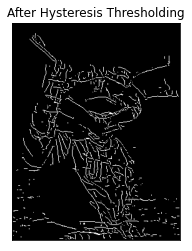

In [26]:
plt.xticks([]), plt.yticks([])
plt.imshow(gthres, cmap='gray')
plt.title('After Hysteresis Thresholding')
# Your final plot should look something like this